In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

##  Intro to Audio

Grab the wavfiles from ./Vocal_Audio_Dir folder

In [2]:
import glob
glob.glob('./Vocal_Audio_Dir/*.wav')

['./Vocal_Audio_Dir/no-thats-not-gonna-do-it.wav',
 './Vocal_Audio_Dir/oh-yeah-everything-is-fine.wav',
 './Vocal_Audio_Dir/open-the-goddamn-door.wav',
 './Vocal_Audio_Dir/president-is-moron.wav',
 './Vocal_Audio_Dir/shes-a-crazy-psycho-1.wav']

IPython.display.Audio lets us play audio directly from Jupyter Notebook. 

In [3]:
from IPython.display import Audio
wavfile = glob.glob('./Vocal_Audio_Dir/*.wav')[4]
Audio(wavfile)

### Librosa

Librosa is a Python package for audio and music signal processing.

In [4]:
import librosa
print(librosa.__version__)

0.7.2


### Audio wave in time domain

First, to read an audio file, pass the file to librosa.load()

In [5]:
y, sr = librosa.load(wavfile)
print("Sampling rate  :", sr)
print("Signal Length:", len(y))
print("Duration     :", len(y)/sr, "seconds")

Sampling rate  : 22050
Signal Length: 35316
Duration     : 1.6016326530612246 seconds


Essentially, audio is an analog, one continuous signal with no break.It is converted to digital by sampling the signal and get the amplitude value at each sampling time and store them in an array.

Pretty much like Matlab, the audio signal is represented by librosa as a one-dimensional array, denoted as y, accompanied by the sampling rate (denoted sr) in Hz at which values of y are sampled. 

By default, when loading stereo audio files, the librosa.load() function automatically downmixes to mono by averaging left- and right-channels, and then resamples the monophonic signal to the default rate sr=22050 Hz. To keep the original sampling rate, specify 'sr=None' and to keep the stereo mode, soecify 'mono=False'.

In [6]:
y, sr = librosa.load(wavfile, sr=None)
print("Sampling rate  :", sr)
print("Signal Length:", len(y))
print("Duration     :", len(y)/sr, "seconds")

Sampling rate  : 44100
Signal Length: 70631
Duration     : 1.6016099773242631 seconds


Now the sr is set to 44.1 kHz. In order to adequately reproduce a signal, it should be periodically sampled at a rate that is 2X the highest frequency (Nyquist sampling rate theorem). 

We can plot the waveform using librosa.display.waveplot(). Note that we have to specify the sr (in this case 44.1 kHz). Now the duration the of the signal is around ~1.6s, same as calculated.

In the time domain, the information we get is simply the loudness of the audio signal at each time frame (1/44100 s). 

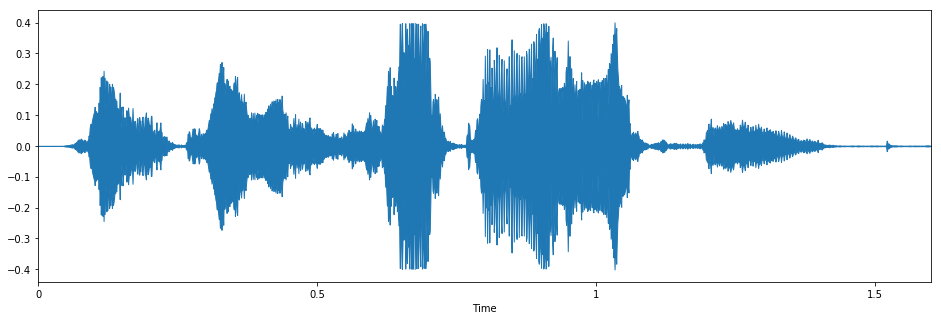

In [7]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(16, 5))
librosa.display.waveplot(y, sr)

### Audio wave in frequency domain

To get more information, it is necessary to transform into the frequency domain. 

Before we get into that, we should understand that signal is made up many sine waves with different aplitudes and phases which can be decomposed.

In [10]:
import numpy as np
def sine_wave(freq, clip_length=1, sr=44100):
    t = np.linspace(0, clip_length, int(clip_length*sr), endpoint=False)
    return 0.1*np.sin(2*np.pi*freq*t)

This is a sine wave signal with frequency of 2Hz. In 1 second it has 2 cycles. 

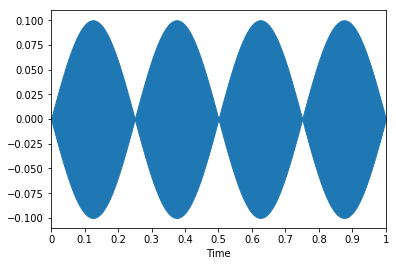

In [11]:
wave_2Hz = sine_wave(2)
librosa.display.waveplot(wave_2Hz, sr)

This one is 20Hz. So in 1 second it has 20 cycles. 

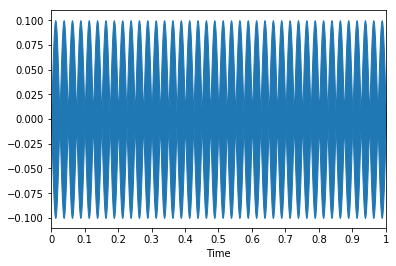

In [12]:
wave_20Hz = sine_wave(20)
librosa.display.waveplot(wave_20Hz, sr)

Audio signals have frequencies in the audio frequency range of roughly 20 to 20,000 Hz, which corresponds to the lower and upper limits of human hearing.

We can hear the difference in pitch. The higher the frequency, the higher the pitch.

In [13]:
wave_500Hz = sine_wave(500)
Audio(wave_500Hz, rate=sr)

In [14]:
wave_5000Hz = sine_wave(5000)
Audio(wave_5000Hz, rate=sr)

In [15]:
wave_10000Hz = sine_wave(10000)
Audio(wave_10000Hz, rate=sr)

### Spectrogram

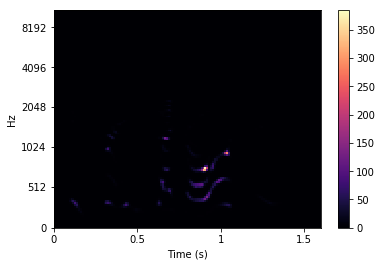

In [16]:
spec = librosa.feature.melspectrogram(y, sr=sr)
librosa.display.specshow(spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar()

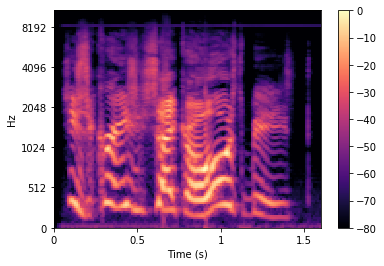

In [17]:
db_spec = librosa.power_to_db(spec, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar();